In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.linear_model import Ridge

import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import seaborn as sns

Ridge on real data

dataset and description here https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Online%20News%20Popularity

In [ ]:
dataset = pd.read_csv('https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Online%20News%20Popularity/OnlineNewsPopularity.csv')
dataset.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
dataset.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [ ]:
dataset.isnull().any()

url                              False
 timedelta                       False
 n_tokens_title                  False
 n_tokens_content                False
 n_unique_tokens                 False
                                 ...  
 title_subjectivity              False
 title_sentiment_polarity        False
 abs_title_subjectivity          False
 abs_title_sentiment_polarity    False
 shares                          False
Length: 61, dtype: bool

In [ ]:
# X = dataset.iloc[:,list(range(1,59))]
X = dataset.iloc[:,[2,7,8,9,10,12]]
y = dataset.iloc[:, 60]

In [ ]:
X

,n_tokens_title,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords
0,12.0,4.0,2.0,1.0,0.0,5.0
1,9.0,3.0,1.0,1.0,0.0,4.0
2,9.0,3.0,1.0,1.0,0.0,6.0
3,9.0,9.0,0.0,1.0,0.0,7.0
4,13.0,19.0,19.0,20.0,0.0,7.0
...,...,...,...,...,...,...
39639,11.0,9.0,7.0,1.0,1.0,8.0
39640,12.0,9.0,7.0,3.0,48.0,7.0
39641,10.0,24.0,1.0,12.0,1.0,8.0
39642,6.0,10.0,1.0,1.0,0.0,5.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Linear regression

In [ ]:
regressorL = LinearRegression()  
regressorL.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressorL.intercept_)
print(regressorL.coef_)

1656.0729959775292
[ 48.74189583  41.78461746 -86.32312274  47.27281185  73.28944265
 106.30727355]


In [ ]:
y_predL = regressorL.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_predL})

dfL = df.head(25)
print(dfL)

       Actual    Predicted
18765     919  2901.723909
16349    1600  3152.245549
27703   11700  4376.060290
32947   18000  3799.216318
35434    5800  2841.943349
37965    1100  3031.442319
21595    1500  5114.989706
29565     353  2890.377176
19175    2900  2923.691509
29417    1700  2663.424563
35994    1200  2914.911949
17847     589  2617.443363
34144    1200  2886.698489
13462     569  4652.178883
31618    2200  4354.746593
24555    3400  2870.607611
37776    1100  2710.723764
4003     2300  4139.712309
33148    1400  3089.589097
4487     1800  2878.799806
13482   15000  3817.514029
32614     721  3698.024124
33600    1300  3791.698671
1400     1500  3255.287004
3388     8600  3364.945109


Ridge regression

In [ ]:
# alpha is metter
# ridge_reg = Ridge()
ridge_reg = Ridge(alpha=100000)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=100000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

2205.493238326539
[ 29.05797791  40.18512529 -65.6244182   44.28060414  60.41231143
  55.64297167]


In [ ]:
y_pred_r = ridge_reg.predict(X_test)
# df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_r.flatten()})
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_r})
dfR = df.head(25)
print(dfR)

       Actual    Predicted
18765     919  3055.329545
16349    1600  3138.017420
27703   11700  4194.211129
32947   18000  3956.033979
35434    5800  3017.902084
37965    1100  3096.451373
21595    1500  5174.587846
29565     353  2904.415130
19175    2900  2980.723929
29417    1700  2821.027430
35994    1200  2973.423013
17847     589  2781.290026
34144    1200  2956.401264
13462     569  4400.813539
31618    2200  4223.284095
24555    3400  2880.790445
37776    1100  2835.787296
4003     2300  4106.350204
33148    1400  3131.213737
4487     1800  2921.633947
13482   15000  3736.054032
32614     721  3502.935771
33600    1300  3698.031741
1400     1500  3115.147856
3388     8600  3385.396073


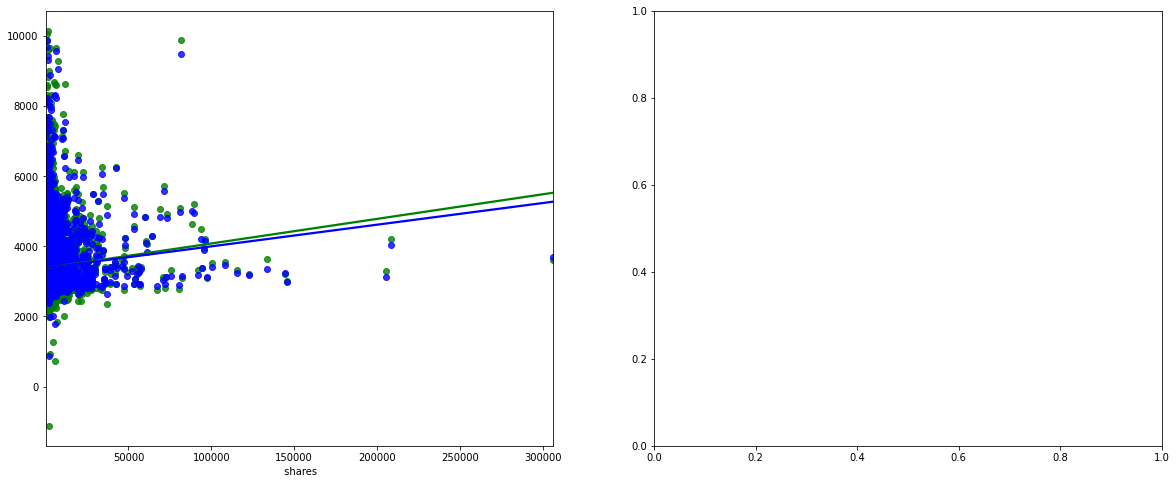

In [ ]:
plt.rcParams['figure.figsize'] = [20, 8]
fig, axs = plt.subplots(ncols=2)
sns.regplot(x=y_test, y=y_predL, ci=None, ax=axs[0], color="g")
sns.regplot(x=y_test, y=y_pred_r, ci=None, ax=axs[0], color="b")

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

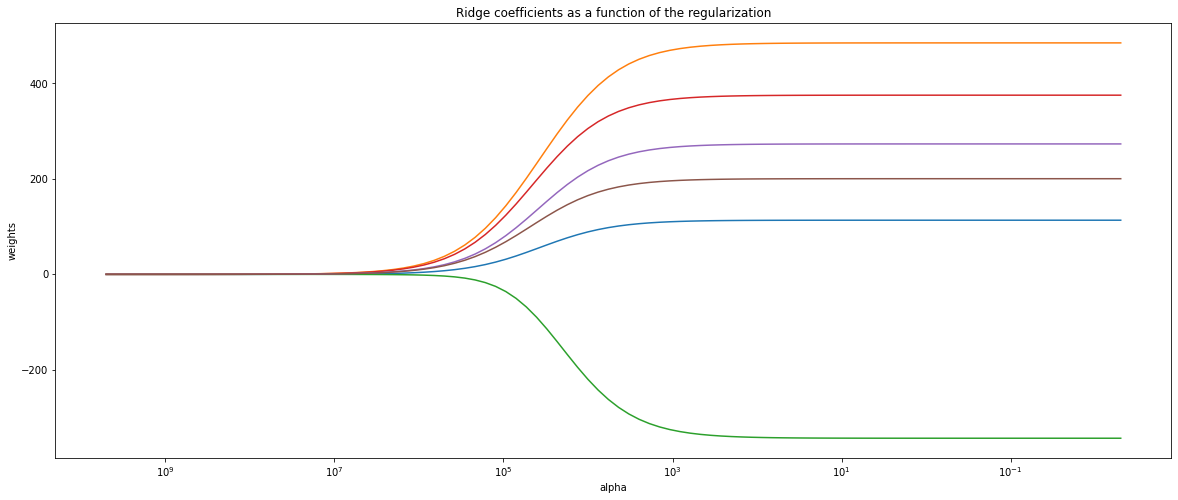

In [ ]:
from sklearn.preprocessing import scale 

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)
    # print(ridge.coef_)
# Save coefficient set for every alpha. 
# To get the current axes on the current figure:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
# Set limits just large enough to show all data, then disable further autoscaling.
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [48]:
from sklearn.model_selection import GridSearchCV

# alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
alpha_values = {'alpha':list(10**np.linspace(10,-2,100)*0.5)}

ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',ridge.fit(X,y).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',ridge.fit(X,y).best_score_)


The best value of alpha is: {'alpha': 53613.36110051616}
The best score for the best Ridge estimator is: -134748306.71965235
